#Problem 2: Constant pressure adiabatic stirred batch reactor with variable heat capacities

Author: Zuria Bauer [CAChemE.org](http://cacheme.org) 

The following elementary gas‐phase reaction 
is conducted in a laboratory‐scale stirred batch reactor:

$$ A(g) + B(g) \rightarrow 2C(g) + D(g) $$

The reactor is initially charged with an equimolar mixture of gases A and B, together with other inert species (I).
The amount of A introduced is 4 mol and the total amount of gas mixture fed into the reactor is 500 g. The
average molecular weight of the feed mixture is 40 g/mol. The gas mixture is at initial temperature of 200 ºC
and at pressure of 1 atm. The reactor operates at constant pressure under adiabatic conditions. The reaction is
exothermic and the enthalpy change of reaction is ‐12500 J/(mol of C) for a reference temperature of 20 º C.
The reaction rate constant is represented by the following expression:

$$ \ln{k} = 8.2 - \frac{1000}{T}$$

(T is in Kelvin and k in $\frac{L}{mol·h}$)

For a conversion interval [0 ‐ 0.9] plot two charts: time vs conversion and temperature vs conversion including
in each these two cases:

- Assume an average heat capacity,$C_{p_{mj}}$, for each component.

- [In progress] Consider the variation of the heat capacity with the temperature for each component according to the following expression:
$$ C_{p_j}(T) = a_j + b_j T + c_j T^2 + d_j T^3$$

####Data

|$$\phantom{m}Component\phantom{m}$$|$$\phantom{m}a_j\phantom{m}$$|$$\phantom{m}b_j \phantom{}x\phantom{} 10^2\phantom{m}$$|$$\phantom{m}c_j \phantom{}x\phantom{} 10^5\phantom{m}$$|$$\phantom{m}d_j \phantom{}x\phantom{} 10^9\phantom{m}$$|$$\phantom{m}Cp_{m,j} \phantom{m}(\frac{J}{mol·K})\phantom{m}$$|
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
|A|9.8564|0.0026|0.1124|-0.2973|10|
|B|11.3934|1.3356|-0.9109|2.3550|15|
|C|11.5188|0.9680|0.1449|-2.1910|15|
|D|11.4532|0.0868|0.2260|-1.1339|12|
|I|10.3337|3.4313|-0.9913|4.8166|20|

##Code

In [1]:
#let's import the Python libraries we need:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from __future__ import division

%matplotlib inline

plt.style.use('bmh')

In [2]:
#Widgets

from IPython.html.widgets import interact
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Ok we are ready to go!

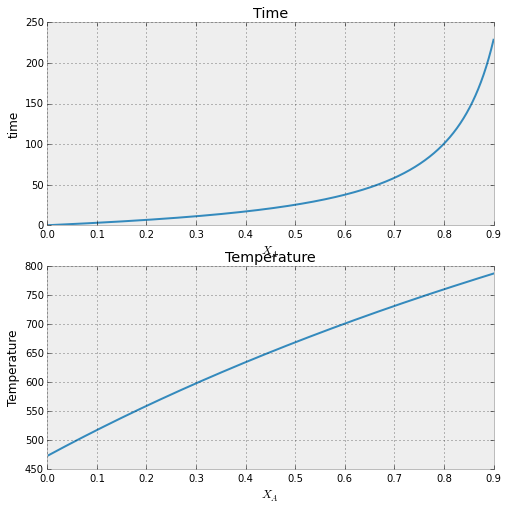

In [3]:
#Data

Nt0 = 12.5 #moles
Rg = 8.31 #J/mol·K
P = 1 #atm
Ea = 0.32
Na0 = 4
alfa = -1
Nj0 = np.array([4, 4, 0, 0, 4.5])
Cpj = np.array([10, 15, 15, 12, 20])
alfaj = np.array([-1, -1, 2, 1, 0])
Href = -12500 * 2
Tref = 293

#Initial data
t0 = 0
T0 = 472

def diff_eqs(y,Xa):
    
    t = y[0]
    T = y[1]
    
    K = np.exp(8.2 - (1000/T))
    H = Href + (np.dot(alfaj, Cpj)*(T-Tref))
    dtdXa = (Nt0 * Rg * T * (1 + Ea * Xa)) / (K * Na0 * (1 - Xa) ** 2 * P)
    dTdXa = (-(Na0 / (-alfa)) * H)/(np.dot(Nj0, Cpj) + ((Xa * Na0 / (-alfa)) * np.dot(alfaj, Cpj)))

    dy = [dtdXa, dTdXa]
    
    return (dy)

#Initial conditions given for the reactor

y0 = np.array([t0, T0])
X = np.linspace(0, 0.9, 10000)

# solving the ODEs

soln = odeint(diff_eqs, y0, X)

t = soln[:, 0] # mol*L-1
T = soln[:, 1]

# Plotting the results

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,  figsize=(8,8))
ax1.plot(X, t)

ax1.set_ylabel('time')
ax1.set_xlabel(u'$X_A$')
ax1.set_title(u'Time')

ax2.plot(X, T)

ax2.set_ylabel('Temperature')
ax2.set_xlabel(u'$X_A$')
ax2.set_title(u'Temperature')

Ok, that's nice. What if we introduce the Widgets?

####Widgets

In [4]:
def Ejercicio2(Na0):    
    #Data

    Nt0 = 12.5 #moles
    Rg = 8.31 #J/mol·K
    P = 1 #atm
    Ea = 0.32
    #Na0 = 4
    alfa = -1
    Nj0 = np.array([4, 4, 0, 0, 4.5])
    Cpj = np.array([10, 15, 15, 12, 20])
    alfaj = np.array([-1, -1, 2, 1, 0])
    Href = -12500 * 2
    Tref = 293

    #Initial conditions
    
    t0 = 0
    T0 = 472

    def diff_eqs(y,Xa):

        t = y[0]
        T = y[1]

        K = np.exp(8.2 - (1000/T))
        H = Href + (np.dot(alfaj, Cpj)*(T-Tref))
        dtdXa = (Nt0 * Rg * T * (1 + Ea * Xa)) / (K * Na0 * (1 - Xa) ** 2 * P)
        dTdXa = (-(Na0 / (-alfa)) * H)/(np.dot(Nj0, Cpj) + ((Xa * Na0 / (-alfa)) * np.dot(alfaj, Cpj)))

        dy = [dtdXa, dTdXa]

        return (dy)
    
    
    #Initial conditions given for the reactor
    
    y0 = np.array([t0, T0])
    X = np.linspace(0, 0.9, 10000)
    
    # solving the ODEs
    
    soln = odeint(diff_eqs, y0, X)

    t = soln[:, 0] # mol*L-1
    T = soln[:, 1]

    # Plotting the results
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,  figsize=(8,8))
    ax1.plot(X, t)

    ax1.set_ylabel('time')
    ax1.set_xlabel(u'$X_A$')
    ax1.set_title(u'Time')

    ax2.plot(X, T)

    ax2.set_ylabel('Temperature')
    ax2.set_xlabel(u'$X_A$')
    ax2.set_title(u'Temperature')

<function __main__.Ejercicio2>

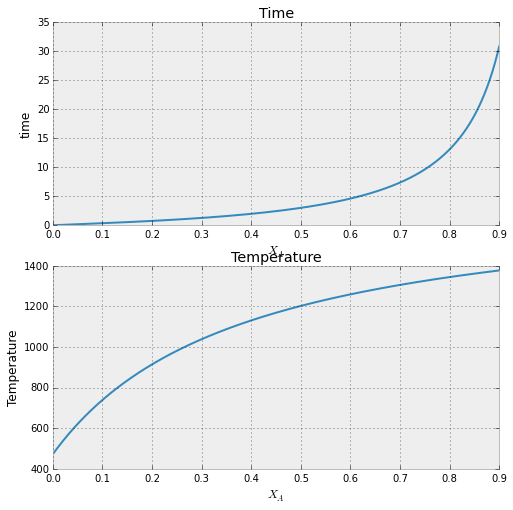

In [5]:
interact(Ejercicio2,
         Na0 = (0.1, 60., 1.))